# PCD Assignment 03

Daffa M. Siddiq - 24/533358/PA/22569

Pengolahan Citra Digital (KOM) - Assignment 3

---

Before we start the code and talk about each enhancement techniques, I will upload two images that will be used as reference.

Make sure to upload a 1:1 grayscale image to allow the algorithm to work properly and display the image without streching.

In [5]:
# Input a grayscale image, this is to make it workable for the algorithm.
# However, the algorithm will convert it to B&W
from google.colab import files
uploaded = files.upload()

Saving image1.png to image1.png
Saving image2.JPG to image2.JPG


# Image Thresholding and Morphological Processing

## Brief Explanation

**Global Thresholding**

Global thresholding is a simple segmentation technique. It selects a single intensity value (threshold) that separates foreground (object) from the background.

$$\text{if } f(x,y) > T \Rightarrow 255, \text{ else } 0$$

Choosing a good threshold manually is usually sufficient for simple, well-lit images.

<br>

---

<br>

**Erosion**

A basic morphological operation that *shrinks white regions (foreground)* in a binary image. Uses a small matrix *kernel* (usually 3x3) that slides over the image.

This is how it works.

$$
\text{Erosion: } (A \ominus B)(x, y) =
\begin{cases}
255, & \text{if all pixels under } B \text{ are white (255)} \\
0, & \text{otherwise}
\end{cases}
$$

A pixel remains white **only if all** neighboring pixels are covered by the kernel, otherwise it turns black.

<br>

---

<br>

**Dilation**

It's the opposite of erosion. Expands white regions in binary image. Also use *kernel* to determine the neighbor of each pixel.

This is how it works.

$$
\text{Dilation: } (A \oplus B)(x, y) =
\begin{cases}
255, & \text{if any pixel under } B \text{ is white (255)} \\
0, & \text{otherwise}
\end{cases}
$$

If **at least** one pixel in the neighborhood is white, the center pixel becomes white.

<br>

---

<br>

**Opening (Erosion -> Dilation)**

Opening is a morphological operations that does erosion followed by dilation using the **same** *kernel*

$$
\text{Opening}(A) = (A \ominus B) \oplus B
$$

$$ \ominus = Erosion $$
$$ \oplus = Dilation $$

In opening, erosion first shrinks the white regions (removes noise), and dilation restore the main shape, but the removed noise does not reappear.

<br>

---

<br>

**Closing (Dilation -> Erosion)**

It's the opposite of opening. It applies dilation first, then Erosion.

$$
\text{Closing}(A) = (A \oplus B) \ominus B
$$

$$ \ominus = Erosion $$
$$ \oplus = Dilation $$

Dilation first expands white regions to fill gaps, and erosion then slightly shrinks them back to original size, but the holes filled are now kept.

## Code Implementation

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

def show_multiple(images, titles, figsize=(20,6)):
    plt.figure(figsize=figsize)
    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(1, len(images), i+1)
        plt.imshow(img, cmap='gray')
        plt.title(title)
        plt.axis('off')
    plt.show()

# Global Thresholding
def global_threshold(img, T=128):
    h, w = img.shape
    result = np.zeros((h, w), dtype=np.uint8)
    for i in range(h):
        for j in range(w):
            result[i, j] = 255 if img[i, j] > T else 0
    return result

# Morphological Operations
def pad_image(img, pad=1):
    return np.pad(img, pad, mode='constant', constant_values=0)

# Erosion
def erosion(img):
    padded = pad_image(img)
    result = np.zeros_like(img)
    for i in range(1, img.shape[0]+1):
        for j in range(1, img.shape[1]+1):
            region = padded[i-1:i+2, j-1:j+2]
            result[i-1, j-1] = 255 if np.all(region == 255) else 0
    return result

# Dilation
def dilation(img):
    padded = pad_image(img)
    result = np.zeros_like(img)
    for i in range(1, img.shape[0]+1):
        for j in range(1, img.shape[1]+1):
            region = padded[i-1:i+2, j-1:j+2]
            result[i-1, j-1] = 255 if np.any(region == 255) else 0
    return result

# Opening (Erosion then Dilation)
def opening(img):
    return dilation(erosion(img))

# Closing (Dilation then Erosion)
def closing(img):
    return erosion(dilation(img))

Processing: image1.png


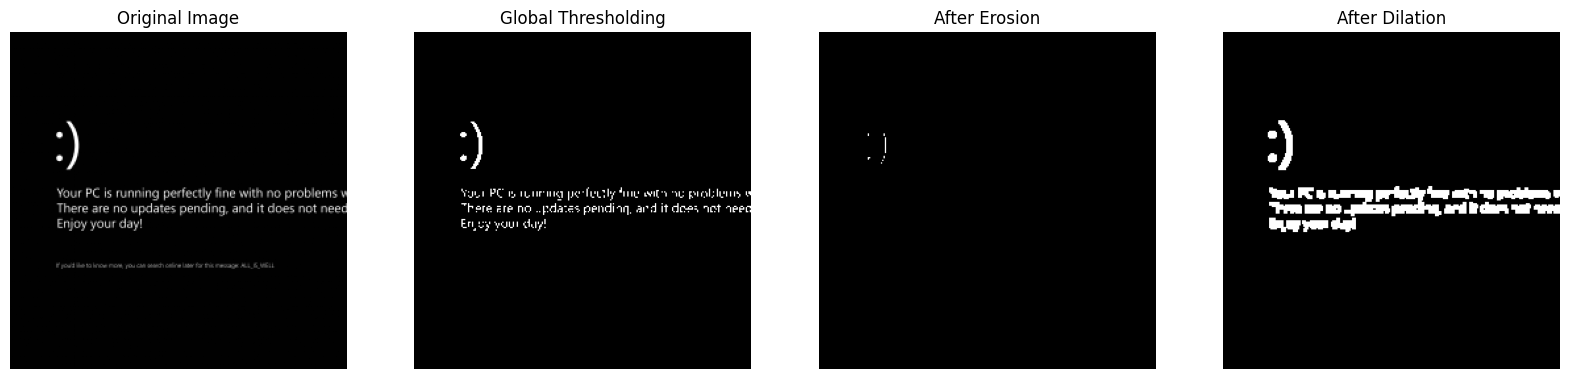

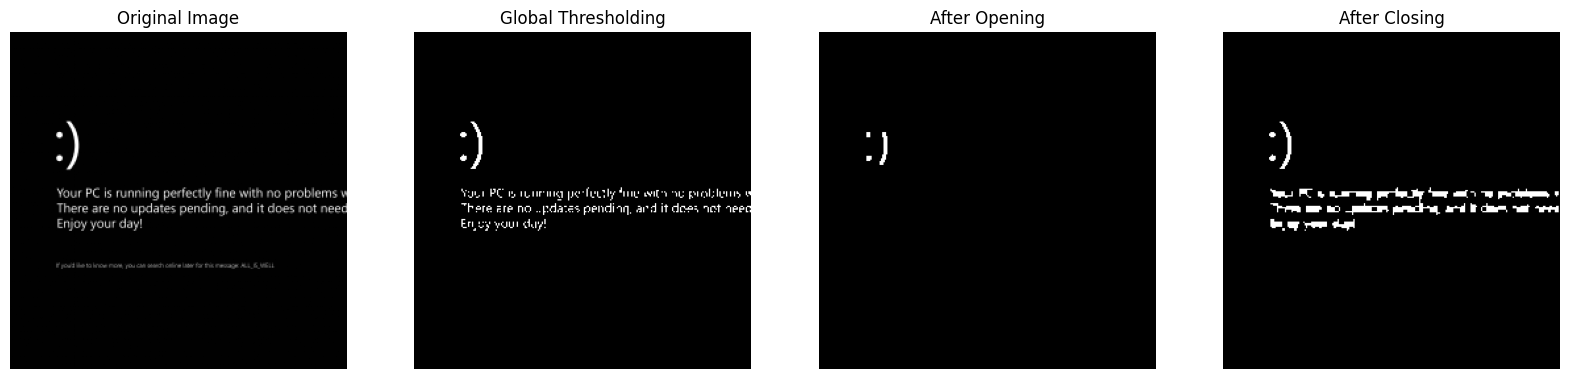

Processing: image2.JPG


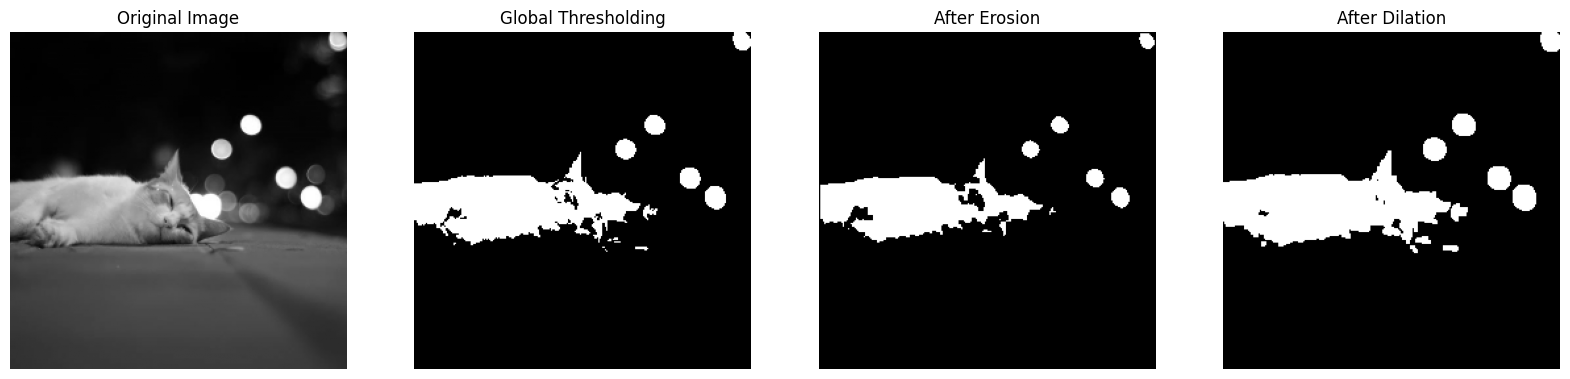

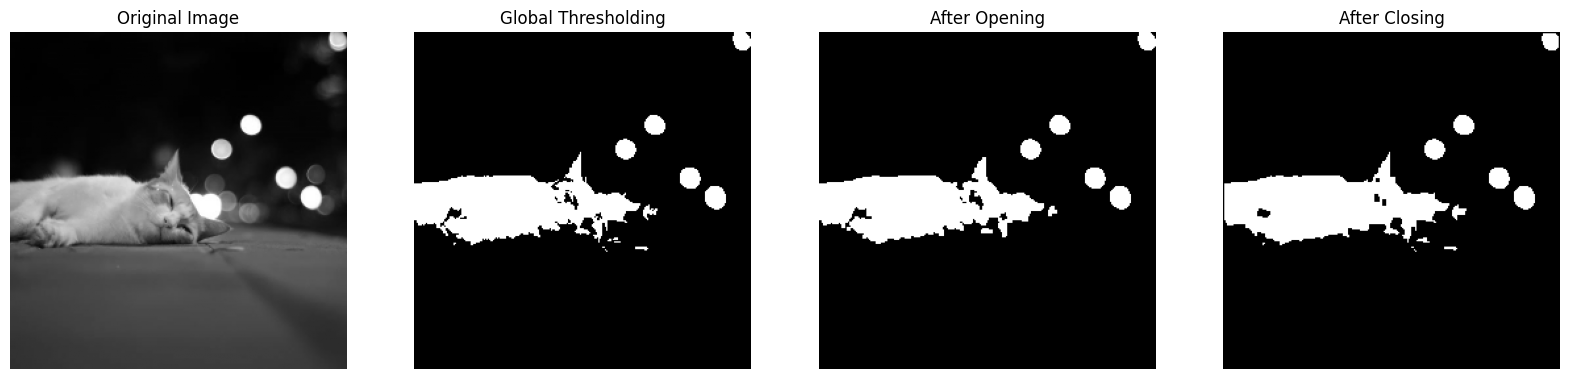

In [7]:
# Process uploaded images
for filename in uploaded.keys():
    print(f"Processing: {filename}")
    img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (256, 256))

    # 1. Segmentation w/ global thresholding
    segmented = global_threshold(img, T=128)

    # 2. Morphological operations
    eroded = erosion(segmented)
    dilated = dilation(segmented)
    opened = opening(segmented)
    closed = closing(segmented)

    # 3. Comparisons
    show_multiple(
        # Erosion compared with Dilation
        [img, segmented, eroded, dilated],
        ["Original Image", "Global Thresholding", "After Erosion", "After Dilation"]
    )
    show_multiple(
        # Opening compared with Closing
        [img, segmented, opened, closed],
        ["Original Image", "Global Thresholding", "After Opening", "After Closing"]
    )

# Thank You!

LOCALLY ROOTED

GLOBALLY RESPECTED